In [55]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [57]:
housing.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

In [58]:
cat_vars = housing.select_dtypes(include=['object', 'category'])
num_vars = housing.select_dtypes(include=['number'])
cat_vars.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [59]:
num_vars.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


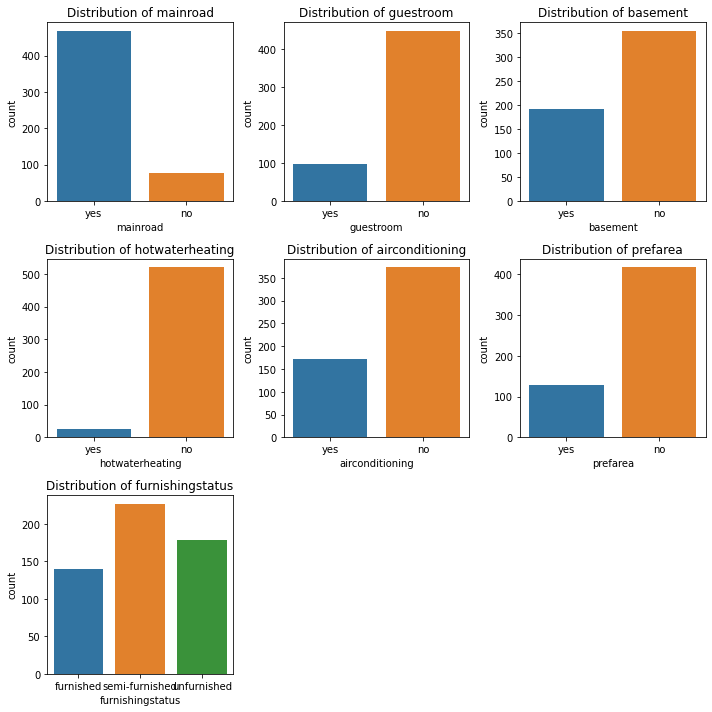

In [60]:
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

cat_order = {'mainroad': ['yes', 'no'],
             'guestroom': ['yes', 'no'],
             'basement': ['yes', 'no'],
             'hotwaterheating': ['yes', 'no'],
             'airconditioning': ['yes', 'no'],
             'prefarea': ['yes', 'no'],
             'furnishingstatus': ['furnished','semi-furnished', 'unfurnished']}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

axes = axes.flatten()

# Plot each categorical variable with the specified order
for i, cat_var in enumerate(cat_vars):
    sns.countplot(x=cat_var, data=housing, order=cat_order[cat_var], ax=axes[i])
    axes[i].set_title(f'Distribution of {cat_var}')

# Remove any unused subplots
for j in range(len(cat_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('categorical_plots.pdf')
plt.show()

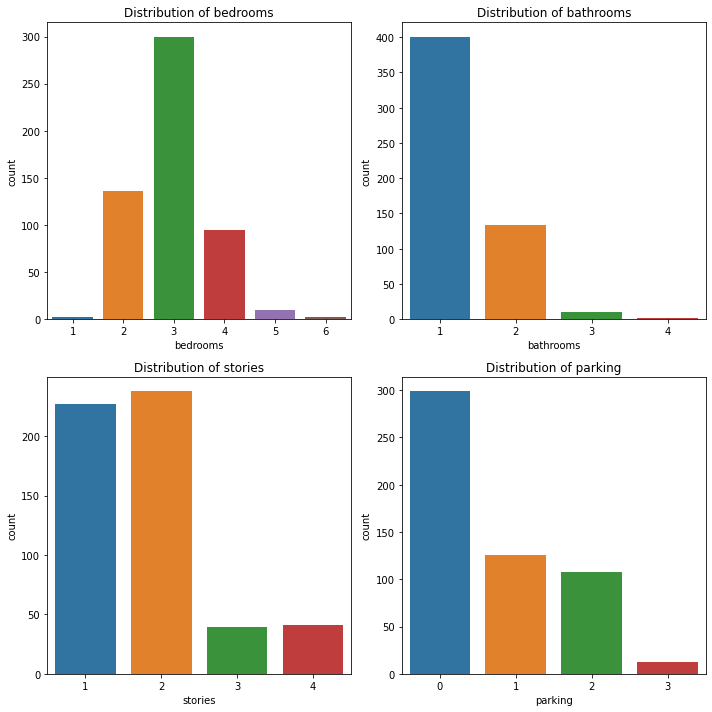

In [61]:
num_vars = ['bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes = axes.flatten()

# Plot each categorical variable
for i, num_vars in enumerate(num_vars):
    sns.countplot(x=num_vars, data=housing, ax=axes[i])
    axes[i].set_title(f'Distribution of {num_vars}')

# Remove any unused subplots
for j in range(len(num_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('numerical_plots.pdf')
plt.show()